In [1]:
%load_ext autoreload
%autoreload 2


import torch
from text3d2video.artifacts.vertex_atributes_artifact import VertAttributesArtifact
import text3d2video.wandb_util as wu
from text3d2video.artifacts.animation_artifact import AnimationArtifact
from text3d2video.rendering import render_depth_map
from text3d2video.util import front_camera
from pytorch3d.renderer import TexturesVertex

In [4]:
features_3d_artifact_tag = 'deadpool-3d-features:v6'
animation_tag = 'backflip:latest'

features_3d = wu.get_artifact(features_3d_artifact_tag)
features_3d = VertAttributesArtifact.from_wandb_artifact(features_3d)

animation = wu.get_artifact(animation_tag)
animation = AnimationArtifact.from_wandb_artifact(animation)

In [5]:
identifier = features_3d.get_features_disk_dict().keys()[0]
vert_features = features_3d.get_features_disk_dict()[identifier]

/home/jorge/thesis/text3d2video/disk_multidict.py:60: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return self.deserialization_fun(path)


In [6]:
frame_indices = [1,2,3,4,5]

# get frames
camera = front_camera()
frames = animation.load_frames(frame_indices)

/home/jorge/miniconda3/envs/thesis4/lib/python3.9/site-packages/pytorch3d/io/obj_io.py:546: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")


In [9]:
from text3d2video.rendering import make_feature_renderer

device = torch.device('cuda')

batched_vert_features = vert_features.expand(len(frames), *vert_features.shape)
vert_tex = TexturesVertex(verts_features=batched_vert_features).to(device)
frames.textures = vert_tex

renderer = make_feature_renderer(camera, 100)

with torch.no_grad():
    out = renderer(frames)

out.shape

torch.Size([5, 100, 100, 3, 1280])

In [55]:
import matplotlib.pyplot as plt

renderer = make_feature_renderer(camera, 100)

with torch.no_grad():
    out = renderer(frames).cpu()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5043871..0.77381426].


torch.Size([5, 100, 100, 1280])

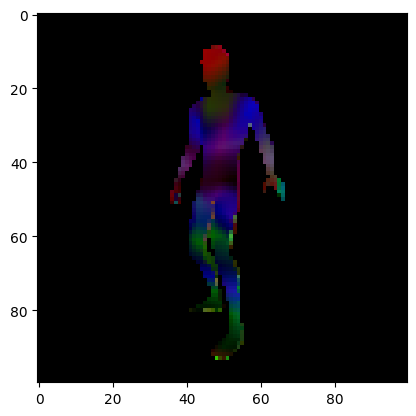

: 

In [66]:
plt.imshow(out[0, :,:, 0:3])
out.shape

In [65]:
from text3d2video.rendering import rasterize_vertex_features


rasterize_vertex_features(camera, frames, 100, vert_features.cuda()).shape

torch.Size([5, 1280, 100, 100])